<h1 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home"> Numpy, Pandas and Visualization Mini Project </h1>
     


In [58]:
import pandas as pd
import numpy as np 
import re
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as exp

<h5 class="list-group-item list-group-item-action active" >1. Create a dataframe like the below format </h5>



|Identifier|    |Date|  |Code_For_Name||Full_Name|
|----------|----|----|--|-----------|------|----------|
|1| |1979 [1978]|   |K. K.| |Mickéy Mousé|
|2| |1868|  |L., L. L.| |Donald Duck|
|218|   |1869|  |RemaÊ¿.||Mini Mouse|
|472|   |1851|  |A'BECKETT, Gilbert Abbott.||Donald Duck|
|5| |1857|  |ABATI, Francesco.||Pink Panther|


>###### 1.A) Clean the `date` column as shown in below format without using replace function.

                                    **Sample Input**

|Date|
|----|
|1979 [1978]| 
|1868|
|1869| 
|1851|
|1857|

                                    **Sample Ouput**

|Date|
|----|
|1979| 
|1868|
|1869| 
|1851|
|1857|


>###### 1.B) Clean the `Code_For_Name` column as shown in below format without using replace function.

                                    **Sample Input**

|Code_For_Name|
|----|
|K. K.| 
|L., L. L.|
|Rema¿.| 
|A'BECKETT, Gilbert Abbott.|
|ABATI, Francesco.|

                                    **Sample Ouput**

|Code_For_Name|
|----|
|KK| 
|LLL|
|Rema| 
|GilbertAbbottAbeckett|
|FrancescoAbati|


>###### 1.C) Clean the `Full_Name` column as shown in below format.

                                    **Sample Input**

|Full_Name|
|----|
|Mickéy Mousé| 
|Donald Duck|
|Mini Mouse| 
|Donald Duck|
|Pink Panther|

                                    **Sample Ouput**

|Firstname||Lastname|
|----|----|----|
|Micky| |Mous|
|Donald||Duck|
|Mini| |Mouse|
|Donald||Duck|
|Pink||Panther|



####  1.A) Clean the `date` column as shown in below format without using replace function.

In [59]:
df = pd.DataFrame({"Identifier":[1,2,218,472,5],"Date":["1979[1978]","1868","1869","1851","1857"],
                   "Code_for_Name":["K.K","L.,L.L","RemaÊ¿.","A\'BECKETT, Gilbert Abbott""","ABATI, Francesco"],
                   "Full_Name":["Mickéy Mousé","Donald Duck","Mini Mouse","Donald Duck","Pink Panther"]})
df

,Identifier,Date,Code_for_Name,Full_Name
0,1,1979[1978],K.K,Mickéy Mousé
1,2,1868,"L.,L.L",Donald Duck
2,218,1869,RemaÊ¿.,Mini Mouse
3,472,1851,"A'BECKETT, Gilbert Abbott",Donald Duck
4,5,1857,"ABATI, Francesco",Pink Panther


In [26]:
df.loc[0,"Date"] = "1979"
df

,Identifier,Date,Code_for_Name,Full_Name
0,1,1979,K.K,Mickéy Mousé
1,2,1868,"L.,L.L",Donald Duck
2,218,1869,RemaÊ¿.,Mini Mouse
3,472,1851,"A'BECKETT, Gilbert Abbott",Donald Duck
4,5,1857,"ABATI, Francesco",Pink Panther


###### 1.B) Clean the `Code_For_Name` column as shown in below format without using replace function.

In [60]:
df['Code_for_Name']=df['Code_for_Name'].apply(lambda x: re.sub(r"[^A-Za-z]+","", x))
df

,Identifier,Date,Code_for_Name,Full_Name
0,1,1979[1978],KK,Mickéy Mousé
1,2,1868,LLL,Donald Duck
2,218,1869,Rema,Mini Mouse
3,472,1851,ABECKETTGilbertAbbott,Donald Duck
4,5,1857,ABATIFrancesco,Pink Panther


###### 1.C) Clean the `Full_Name` column as shown in below format.


In [61]:
df["Full_Name"].replace({"Mickéy Mousé":"Micky Mous"},inplace=True)
df[["Firstname","Lastname"]] = df.Full_Name.str.split(expand = True)
df.drop("Full_Name",axis = 1,inplace=True)
df

,Identifier,Date,Code_for_Name,Firstname,Lastname
0,1,1979[1978],KK,Micky,Mous
1,2,1868,LLL,Donald,Duck
2,218,1869,Rema,Mini,Mouse
3,472,1851,ABECKETTGilbertAbbott,Donald,Duck
4,5,1857,ABATIFrancesco,Pink,Panther


<h5 class="list-group-item list-group-item-action active" >2. Read the dataset called Menu_list_Carbohydrates.csv dataset </h5>

> #### Dataset Content:
This dataset provides a nutrition analysis of every menu item on the Bangalore's famous restaurant's menu, including breakfast, beef burgers, chicken etc..

> ##### A. Display the dataset of dimensions,datatype, statistic summary.

> ##### B. Which are the top 10 items that have the least Carbohydrates?

> ##### C. Which are the top 10 items that have the most Carbohydrates?

> ##### D. Display the bar graph for the frequncy of Categories of food items and write your observations.

> ##### E. An Indian male requires 2500 calories in a day and a female requires 2000 calories in a day to maintain good  

> #####    lifestyle. Find the solutions as displayed in sample output1 and 2.

        Sample Output1:

        * Average calories of 'Beverages' category is 796.67
        * On an Average 'Beverages' contributes to men's calories intake  0.32
        * On an Average 'Beverages' contributes to women's calories intake  0.4

        Sample Output2:

        * Average calories of 'Coffee & Tea' category is 323.33
        * Averagely 'Coffee & Tea' contributes to men's calories intake for  0.13
        * Averagely 'Coffee & Tea' contributes to women's calories intake for  0.16
        
        Steps to get the output1
        1. For each item of Beverages display calorie and calculate the contribution of that food item in the male and females's daily calorie need. 
        2. Calculate average calories for the beverages category
        3. Calculate average contribution of calorie for male's requirement using beverages category
        4. Calculate average contribution of calorie for female's requirement using beverages category
        
        Steps to get the output2
        1. For each item of 'Coffee & Tea' display calorie and calculate the contribution of that food item in the male and    females's daily calorie need. 
        2. Calculate average calories for the 'Coffee & Tea' category
        3. Calculate average contribution of calorie for male's requirement using 'Coffee & Tea' category
        4. Calculate average contribution of calorie for female's requirement using 'Coffee & Tea' category

> ##### F. If you order grilled chicken rather than crispy chicken, what is the change in calorie intake?

            Step1:  Display the suitable graph for the number of calories in Crispy Chicken category

            Step2: Find the average calories for Crispy Chicken Category

            Step3: Display the suitable graph for the number of calories in Grilled Chicken category

            Step4: Find the average calories for Grilled Chicken Category

            Step5: Get the final visual comparison of Crispy vs Grilled on the basis of calories

            Step6: Write your observations.
            
> ##### G. Plot scatter plot between carbohydrates and calories


In [62]:
menu_df = pd.read_csv('Menu_list_Carbohydrates.csv')
menu_df

,Category_Type,Item_in_Menu,Carbohydrates,Sugars,Protein,Calories
0,Breakfast,Egg McMuffin,31,3,17,300
1,Breakfast,Egg White Delight,30,3,18,250
2,Breakfast,Sausage McMuffin,29,2,14,370
3,Beef & Pork,Big Mac,47,2,21,450
4,Beef & Pork,Quarter Pounder with Cheese,41,2,21,400
5,Beef & Pork,Quarter Pounder with Bacon & Cheese,48,3,26,430
6,Chicken & Fish,Premium Crispy Chicken Classic Sandwich,55,3,19,460
7,Chicken & Fish,Premium Grilled Chicken Classic Sandwich,42,4,19,520
8,Chicken & Fish,Premium Crispy Chicken Club Sandwich,58,3,20,410
9,Salads,Premium Bacon Ranch Salad (without Chicken),10,4,20,470


#### A. Display the dataset of dimensions,datatype, statistic summary.

In [63]:
print("The shape of the dataframe is",menu_df.shape)

The shape of the dataframe is (53, 6)


In [64]:
menu_df.ndim

2

In [65]:
menu_df.dtypes

Category_Type    object
Item_in_Menu     object
Carbohydrates     int64
Sugars            int64
Protein           int64
Calories          int64
dtype: object

In [66]:
menu_df.describe()

,Carbohydrates,Sugars,Protein,Calories
count,53.000000,53.00000,53.000000,53.000000
mean,43.169811,8.45283,21.716981,523.207547
std,29.685360,7.18590,9.841782,209.530369
min,0.000000,0.00000,1.000000,150.000000
25%,25.000000,3.00000,17.000000,410.000000
50%,39.000000,7.00000,20.000000,480.000000
75%,58.000000,14.00000,28.000000,600.000000
max,135.000000,32.00000,48.000000,1150.000000


#### B. Which are the top 10 items that have the least Carbohydrates?

In [67]:
a = menu_df.sort_values(by='Carbohydrates',ascending=True).head(10)
a

,Category_Type,Item_in_Menu,Carbohydrates,Sugars,Protein,Calories
38,Coffee & Tea,Iced Tea (Large),0,0,1,150
37,Coffee & Tea,Iced Tea (Medium),0,2,12,300
36,Coffee & Tea,Iced Tea (Small),0,14,15,520
26,Snacks & Sides,Apple Slices,4,7,33,670
25,Snacks & Sides,Side Salad,4,8,30,570
31,Desserts,Kids Ice Cream Cone,7,17,36,1090
11,Salads,Premium Bacon Ranch Salad with Grilled Chicken,8,3,11,480
9,Salads,Premium Bacon Ranch Salad (without Chicken),10,4,20,470
24,Snacks & Sides,Kids French Fries,15,7,30,620
12,Salads,Premium Southwest Salad (without Chicken),20,2,18,510


In [68]:
a['Item_in_Menu']

38                                  Iced Tea (Large)
37                                 Iced Tea (Medium)
36                                  Iced Tea (Small)
26                                      Apple Slices
25                                        Side Salad
31                               Kids Ice Cream Cone
11    Premium Bacon Ranch Salad with Grilled Chicken
9        Premium Bacon Ranch Salad (without Chicken)
24                                 Kids French Fries
12         Premium Southwest Salad (without Chicken)
Name: Item_in_Menu, dtype: object

#### C. Which are the top 10 items that have the most Carbohydrates?

In [69]:
b = menu_df.sort_values(by='Carbohydrates',ascending=False).head(10)
b

,Category_Type,Item_in_Menu,Carbohydrates,Sugars,Protein,Calories
50,Smoothies & Shakes,Vanilla Shake (Large),135,7,24,430
52,Smoothies & Shakes,Strawberry Shake (Medium),114,7,22,380
49,Smoothies & Shakes,Vanilla Shake (Medium),109,7,15,290
51,Smoothies & Shakes,Strawberry Shake (Small),90,14,39,720
48,Smoothies & Shakes,Vanilla Shake (Small),86,6,12,240
41,Smoothies & Shakes,Blueberry Pomegranate Smoothie (Large),79,18,5,260
47,Smoothies & Shakes,Mango Pineapple Smoothie (Large),78,10,48,750
35,Beverages,Coca-Cola Classic (Large),76,14,8,350
44,Smoothies & Shakes,Strawberry Banana Smoothie (Large),74,12,37,600
23,Snacks & Sides,Large French Fries,67,15,21,500


In [70]:
b['Item_in_Menu']

50                     Vanilla Shake (Large)
52                 Strawberry Shake (Medium)
49                    Vanilla Shake (Medium)
51                  Strawberry Shake (Small)
48                     Vanilla Shake (Small)
41    Blueberry Pomegranate Smoothie (Large)
47          Mango Pineapple Smoothie (Large)
35                 Coca-Cola Classic (Large)
44        Strawberry Banana Smoothie (Large)
23                        Large French Fries
Name: Item_in_Menu, dtype: object

#### D. Display the bar graph for frequncy of `Categories` of food items and write your observations.

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

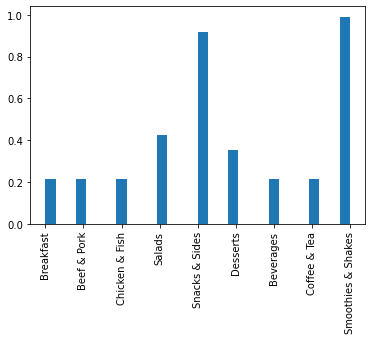

In [71]:
plt.hist(menu_df["Category_Type"],bins = 30,density = True )
plt.xticks(rotation = 90)

# Observations
#### 1. Smoothies & shakes and snacks & slides occurs most of the times
#### 2. The rest of all the categorie types occcurs comparitively less

#### E. An Indian male requires 2500 calories in a day and a female requires 2000 calories in a day to maintain good lifestyle. Find the solutions as displayed in sample output1 and 2.
    Sample Output1:

    * Average calories of 'Beverages' category is 796.67
    * On an Average 'Beverages' contributes to men's calories intake  0.32
    * On an Average 'Beverages' contributes to women's calories intake  0.4
    
    Steps to get the output1
    1. For each item of Beverages display calorie and calculate the contribution of that food item in the male and females's daily calorie need. 
    2. Calculate average calories for the beverages category
    3. Calculate average contribution of calorie for male's requirement using beverages category
    4. Calculate average contribution of calorie for female's requirement using beverages category


In [72]:
s = menu_df[menu_df["Category_Type"] == "Beverages"]
s.drop(["Carbohydrates","Sugars","Protein"],axis = 1)
s

,Category_Type,Item_in_Menu,Carbohydrates,Sugars,Protein,Calories
33,Beverages,Coca-Cola Classic (Small),39,17,35,990
34,Beverages,Coca-Cola Classic (Medium),55,18,35,1050
35,Beverages,Coca-Cola Classic (Large),76,14,8,350


In [73]:
a = menu_df.groupby("Category_Type" )["Calories"].mean()
dframe = pd.DataFrame(a)
dframe

,Calories
Category_Type,
Beef & Pork,426.666667
Beverages,796.666667
Breakfast,306.666667
Chicken & Fish,463.333333
Coffee & Tea,323.333333
Desserts,874.000000
Salads,486.666667
Smoothies & Shakes,472.857143
Snacks & Sides,528.461538


In [41]:
a = dframe.loc["Beverages","Calories"]
print("Average calories of Beverages category is",round(a,2))
print("On an Average Beverages contributes to mens calories intake:",round((a/2500),2))
print("On an Average Beverages contributes to womens calories intake:",round((a/2000),2))

Average calories of Beverages category is 796.67
On an Average Beverages contributes to mens calories intake: 0.32
On an Average Beverages contributes to womens calories intake: 0.4


**Sample Output2**

* Average calories of 'Coffee & Tea' category is 323.33
* Averagely 'Coffee & Tea' contributes to men's calories intake for  0.13
* Averagely 'Coffee & Tea' contributes to women's calories intake for  0.16

    Steps to get the output2
    1. For each item of 'Coffee & Tea' display calorie and calculate the contribution of that food item in the male and    females's daily calorie need. 
    2. Calculate average calories for the 'Coffee & Tea' category
    3. Calculate average contribution of calorie for male's requirement using 'Coffee & Tea' category
    4. Calculate average contribution of calorie for female's requirement using 'Coffee & Tea' category

In [74]:
p = menu_df[menu_df["Category_Type"] == "Coffee & Tea"]
p.drop(["Carbohydrates","Sugars","Protein"],axis = 1)

,Category_Type,Item_in_Menu,Calories
36,Coffee & Tea,Iced Tea (Small),520
37,Coffee & Tea,Iced Tea (Medium),300
38,Coffee & Tea,Iced Tea (Large),150


In [75]:
k = dframe.loc["Coffee & Tea","Calories"]
print("Average calories of Coffee & Tea category is",round(k,2))
print("On an Average Coffee & Tea contributes to mens calories intake:",round((k/2500),2))
print("On an Average Coffee & Tea contributes to mens calories intake:",round((k/2000),2))

Average calories of Coffee & Tea category is 323.33
On an Average Coffee & Tea contributes to mens calories intake: 0.13
On an Average Coffee & Tea contributes to mens calories intake: 0.16


#### F. If you order grilled chicken rather than crispy chicken, what is the change in calorie intake?
        Step1:  Display the suitable graph for the number of calories in Crispy Chicken category

        Step2: Find the average calories for Crispy Chicken Category

        Step3: Display the suitable graph for the number of calories in Grilled Chicken category

        Step4: Find the average calories for Grilled Chicken Category

        Step5: Get the final visual comparison of Crispy vs Grilled on the basis of calories

        Step6: Write your observations.

##### Step1: Display the suitable graph for the number of calories in Crispy Chicken category

Text(0.5, 1.0, 'Calories in crispy chicken')

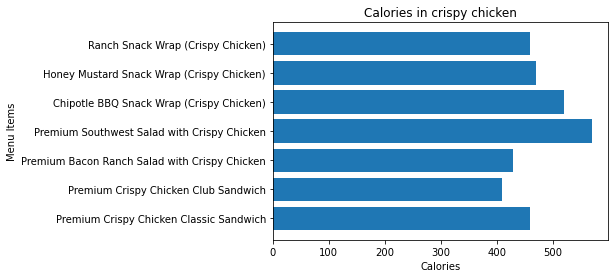

In [76]:
crispy_df = menu_df[menu_df['Item_in_Menu'].str.contains('Crispy Chicken', regex=True, na=True)]

plt.barh(crispy_df["Item_in_Menu"],crispy_df["Calories"])
plt.xlabel("Calories")
plt.ylabel("Menu Items")
plt.title("Calories in crispy chicken")

##### Step2: Find the average calories for Crispy Chicken Category

In [77]:
crispy_avg = crispy_df["Calories"].mean()
print("The average calories for crispy chicken category is",round(crispy_avg,2))

The average calories for crispy chicken category is 474.29


##### Step3: Display the suitable graph for the number of calories in Grilled Chicken category

Text(0.5, 1.0, 'Calories in Grill chicken')

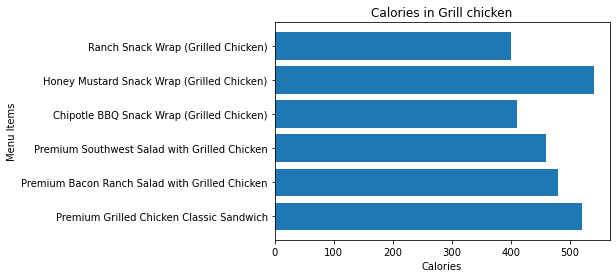

In [85]:
grill_df = menu_df[menu_df['Item_in_Menu'].str.contains('Grilled Chicken', regex=True, na=True)]

plt.barh(grill_df["Item_in_Menu"],grill_df["Calories"])
plt.xlabel("Calories")
plt.ylabel("Menu Items")
plt.title("Calories in Grill chicken")

##### Step4:Find the average calories for Grilled Chicken Category

In [79]:
grill_avg = grill_df["Calories"].mean()
print("The average calories for Grilled Chicken Category is",round(grill_avg,2))

The average calories for Grilled Chicken Category is 468.33


##### Step 5: Get the final visual comparison of Crispy vs Grilled on the basis of calories

In [80]:
data = pd.DataFrame({"Chicken":["Crispy","Grill"],"calories":[crispy_avg,grill_avg]})

exp.histogram(data_frame = data,x = 'Chicken',y = 'calories',title = "Crispy vs Grill")

##### Step6: Write your observations

# OBSERVATIONS
#### 1. The average calories of crispy chicken is slightly higher than the grilled chicken.
#### 2. In crispy chicken categories premium southwest salad with crispy chicken has the highest amount of calories.
#### 3. In Grilled chicken categories Honey Mustard Snack wrap has the highest amount of calories.

##### G. Plot scatter plot between carbohydrates and calories

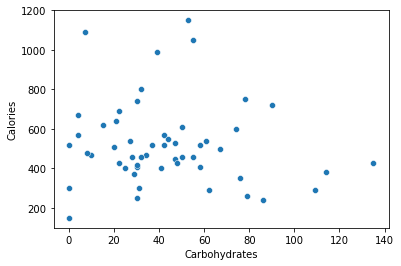

In [81]:
sns.scatterplot(data = menu_df,x = 'Carbohydrates',y = 'Calories')
plt.show()